 # EXAMPLE 3: Simulation of TIMED/GUVI observations

In [ ]:
#pip install EXOSpy==2.3

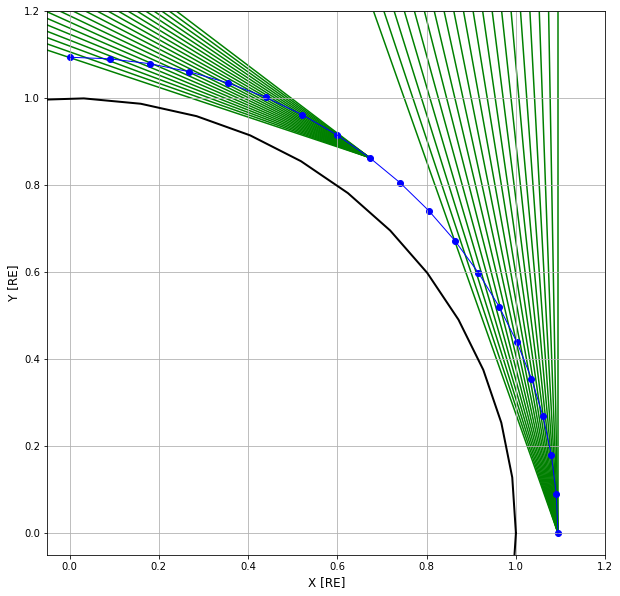

Processing...: 100%|█████████████████████| 400/400 [01:45<00:00,  3.78it/s]


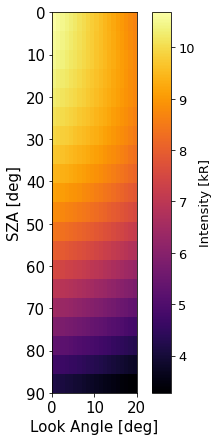

In [8]:
#------- EXAMPLE OPTICALLY THICK -----------------------------------------------
import exospy.exospy as ep
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

SZAmin    = 0  # deg
SZAmax    = 90 # deg
LAmin     = 0   # deg
LAmax     = 20  # deg
altitude  = 600 # km

# To plot GUVI Orbit
numPOS = 20 # fixed for now
numLA  = int(np.ceil(LAmax-LAmin))
phi     = np.linspace(SZAmin*np.pi/180,SZAmax*np.pi/180,numPOS)
radius  = 1 + altitude/6371# RE
x_orb   = radius*np.cos(phi)
y_orb   = radius*np.sin(phi)

# Generating GUVI LOS
r_los = np.zeros((numPOS*numLA,3))
r_pos = np.zeros((numPOS*numLA,3))

count = 0
for i in range(numPOS):
  [th,rho] = ep.cart2pol(x_orb[i],y_orb[i])
  for j in range(numLA):
    r_los[count,0:2] = [-np.sin(th+j*np.pi/180),np.cos(th+j*np.pi/180)] 
    r_pos[count,0:2] = [x_orb[i],y_orb[i]]
    count = count + 1

# To plot Earth
phi       = np.linspace(0,2*np.pi,50)
radius    = 1
x_earth   = radius*np.cos(phi)
y_earth   = radius*np.sin(phi)

# Plotting GUVI Geometry projected to Equatorial plane
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(111)
ax.plot(x_orb,y_orb,color='b',linewidth = 1)
ax.plot(x_earth,y_earth,color='k',linewidth = 2)
ax.scatter(x_orb,y_orb,color='b')

## Plotting LOSs
for i in range(numLA):
  new_point = r_pos[i,:] + 5*r_los[i,:]
  ax.plot([r_pos[i,0],new_point[0]],[r_pos[i,1],new_point[1]],color= 'g',zorder = -1)

for i in range(11*numLA,12*numLA):
  new_point = r_pos[i,:] + 5*r_los[i,:]
  ax.plot([r_pos[i,0],new_point[0]],[r_pos[i,1],new_point[1]],color= 'g',zorder = -1)

ax.grid('on')
ax.set_xlabel('X [RE]',fontsize=12)
ax.set_ylabel('Y [RE]',fontsize=12)
ax.axes.set_xlim(left=-0.05, right=1.2) 
ax.axes.set_ylim(bottom=-0.05, top=1.2) 

plt.show()

# Reading Source Function file
buf = 'VolumeEmissionRates/Sfn_03202020.txt' 
[Altitude,SZA,Temp,O2_dens,H_dens,SS,SM,Irradiance] = ep.ReadingSourceFile(buf)

# Calculating Intensity
IntensityV = np.zeros((numPOS*numLA,1))
for i in tqdm(range(len(IntensityV)),"Processing...",ascii=False, ncols=75):
  IntensityV[i,0] = ep.CalculateLOSfromSourceFunction(r_pos[i,:],r_los[i,:],Altitude,SZA,Temp,O2_dens,H_dens,SS,SM,Irradiance) #CalculateLOSfromSourceFunction(r_pos[i,:],r_los[i,:],Altitude,SZA,Temp,O2_dens,H_dens,SS,SM,dl = 0.1)
  
# Plotting intensities
Intensities = np.reshape(IntensityV,(numPOS,numLA))

extent = 0,20,90,0
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(Intensities/1e9, cmap = 'inferno',origin = 'upper', extent = extent)
cb = fig.colorbar(im, fraction=0.056, pad=0.04)
cb.set_label('Intensity [kR]',fontsize = 13)
cb.ax.tick_params(labelsize=13)
ax.set_ylabel('SZA [deg]',fontsize = 15)
ax.set_xlabel('Look Angle [deg]',fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()